# Importing Packages

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import Counter
import re as regex
import pickle

import plotly
from plotly import graph_objs
import plotly.graph_objs as go
import chart_studio.plotly as py
plotly.offline.init_notebook_mode()
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

from sklearn.model_selection import train_test_split


import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text.tsne import tsne
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from textblob import Word

# Original Dataset

In [34]:
df = pd.read_csv("../data/labeled_data.csv")
df.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [35]:
df.shape

(24783, 7)

In [36]:
df = df.drop("Unnamed: 0", axis=1)

In [37]:
df.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [38]:
df = df.rename(columns={"hate_speech": 'hate', "offensive_language": 'offensive'})
df.head()

count  hate  offensive  neither  class  \
0      3     0          0        3      2   
1      3     0          3        0      1   
2      3     0          3        0      1   
3      3     0          2        1      1   
4      6     0          6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [39]:
hate = len(df[df['class'] == 0])
off = len(df[df['class'] == 1])
neu = len(df[df['class'] == 2])
dist = [
    graph_objs.Bar(
        x=["hate","offensive","neutral"],
        y=[hate, off, neu],
)]
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Class Distribution")})

## Data Cleaning and EDA

In [40]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [41]:
df.tweet.head(30)

0     !!! RT @mayasolovely: As a woman you shouldn't...
1     !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2     !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3     !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5     !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
6     !!!!!!"@__BrighterDays: I can not just sit up ...
7     !!!!&#8220;@selfiequeenbri: cause I'm tired of...
8     " &amp; you might not get ya bitch back &amp; ...
9     " @rhythmixx_ :hobbies include: fighting Maria...
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

## Word Count Per Tweet

In [42]:
def num_of_words(df, col):
    df['word_ct'] = df[col].apply(lambda x: len(str(x).split(" ")))
    print(df[[col, 'word_ct']])

num_of_words(df, 'tweet')

                                                   tweet  word_ct
0      !!! RT @mayasolovely: As a woman you shouldn't...       25
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       16
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       21
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        9
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       26
...                                                  ...      ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...       19
24779  you've gone and broke the wrong heart baby, an...       13
24780  young buck wanna eat!!.. dat nigguh like I ain...       13
24781              youu got wild bitches tellin you lies        7
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...       18

[24783 rows x 2 columns]


In [43]:
df.word_ct.value_counts().sort_values(ascending=False)

9     1398
10    1391
7     1358
11    1340
8     1335
12    1270
13    1232
6     1095
14    1091
16    1063
15    1033
18    1023
5      957
17     925
19     856
21     839
20     835
22     810
23     778
4      725
24     668
25     617
26     512
3      455
27     396
28     247
2      210
29     169
30      81
31      43
32      17
1        8
33       5
36       1
Name: word_ct, dtype: int64

In [44]:
df['word_ct'].iplot(
    kind='hist',
    bins=40,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

## Number of Characters Per Tweet

In [45]:
def num_of_chars(df, col):
    df['char_ct'] = df[col].str.len()
    print(df[[col, 'char_ct']])

num_of_chars(df, 'tweet')

                                                   tweet  char_ct
0      !!! RT @mayasolovely: As a woman you shouldn't...      140
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       85
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      120
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...       62
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      137
...                                                  ...      ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      146
24779  you've gone and broke the wrong heart baby, an...       70
24780  young buck wanna eat!!.. dat nigguh like I ain...       67
24781              youu got wild bitches tellin you lies       37
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      127

[24783 rows x 2 columns]


In [46]:
df.char_ct.value_counts().sort_values(ascending=False)

146    794
140    423
139    277
64     246
58     245
      ... 
392      1
280      1
248      1
255      1
447      1
Name: char_ct, Length: 250, dtype: int64

In [47]:
df['char_ct'].iplot(
    kind='hist',
    bins=100,
    xTitle='character count',
    linecolor='black',
    yTitle='count',
    title='Character Count Distribution')

## Average Word Length Per Tweet

In [48]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

def avg_word_length(df, col):
    df['avg_wrd'] = df[col].apply(lambda x: avg_word(x))
    print(df[[col, 'avg_wrd']].head())

avg_word_length(df, 'tweet')

                                               tweet   avg_wrd
0  !!! RT @mayasolovely: As a woman you shouldn't...  4.640000
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  4.375000
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  4.761905
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  6.000000
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  4.307692


In [49]:
df['avg_wrd'].iplot(
    kind='hist',
    bins=60,
    xTitle='average word length',
    linecolor='black',
    yTitle='count',
    title='Average Word Length Distribution')

## Hashtags Count

In [51]:
def hash_tags(df, col):
    df['hashtags'] = df[col].apply(lambda x: len(re.split(r'#', str(x)))-1)
    print(df[[col, 'hashtags']].head())

hash_tags(df, 'tweet')

                                               tweet  hashtags
0  !!! RT @mayasolovely: As a woman you shouldn't...         0
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         0
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         0
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...         0
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         1


In [52]:
df.hashtags.value_counts()

0     17138
1      3357
2      1890
3       953
4       515
5       278
6       199
7       150
8        95
9        61
10       35
13       21
11       21
12       20
14       12
15        5
18        4
24        4
23        3
27        2
47        2
17        2
25        2
16        2
28        1
65        1
77        1
66        1
39        1
19        1
20        1
36        1
21        1
40        1
22        1
63        1
Name: hashtags, dtype: int64

In [53]:
df['hashtags'].iplot(
    kind='hist',
    bins=100,
    xTitle='hashtags count',
    linecolor='black',
    yTitle='count',
    title='Number of Hashtags Distribution')

In [54]:
df2 = df.copy()
df2.head()

count  hate  offensive  neither  class  \
0      3     0          0        3      2   
1      3     0          3        0      1   
2      3     0          3        0      1   
3      3     0          2        1      1   
4      6     0          6        0      1   

                                               tweet  word_ct  char_ct  \
0  !!! RT @mayasolovely: As a woman you shouldn't...       25      140   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       16       85   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       21      120   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        9       62   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       26      137   

    avg_wrd  hashtags  
0  4.640000         0  
1  4.375000         0  
2  4.761905         0  
3  6.000000         0  
4  4.307692         1

## Removing Callouts or Usernames

In [55]:
df2['callouts'] = df2.tweet.apply(lambda x: re.findall(r'@[\S]+', str(x)))
df2['callouts'].head()

0                    [@mayasolovely:]
1                         [@mleew17:]
2    [@UrKindOfBrand, @80sbaby4life:]
3       [@C_G_Anderson:, @viva_based]
4                  [@ShenikaRoberts:]
Name: callouts, dtype: object

In [56]:
df2.callouts = df2.callouts.apply(lambda x: str(x)[1:-1])
df2.callouts.head()

0                      '@mayasolovely:'
1                           '@mleew17:'
2    '@UrKindOfBrand', '@80sbaby4life:'
3       '@C_G_Anderson:', '@viva_based'
4                    '@ShenikaRoberts:'
Name: callouts, dtype: object

In [57]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'@[\S]+', '', str(x)))
df2.tweet.head(30)

0     !!! RT  As a woman you shouldn't complain abou...
1     !!!!! RT  boy dats cold...tyga dwn bad for cuf...
2     !!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch...
3                 !!!!!!!!! RT   she look like a tranny
4     !!!!!!!!!!!!! RT  The shit you hear about me m...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!!&#8220; cause I'm tired of you big bitches...
8     " &amp; you might not get ya bitch back &amp; ...
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

## Removing Character References

In [58]:
df2['charref'] = df2.tweet.apply(lambda x: re.findall(r'&[\S]+?;', str(x)))
df2.charref.head()

0       [&amp;]
1            []
2            []
3            []
4    [&#57361;]
Name: charref, dtype: object

In [59]:
df2.charref = df2.charref.apply(lambda x: str(x)[1:-1])
df2.charref.head()

0       '&amp;'
1              
2              
3              
4    '&#57361;'
Name: charref, dtype: object

In [60]:
df2.charref.value_counts()

                                                                                         18164
'&#8230;'                                                                                  838
'&#8220;', '&#8221;'                                                                       674
'&amp;'                                                                                    430
'&#128514;'                                                                                220
                                                                                         ...  
'&#8220;', '&#128514;', '&#128514;', '&#128514;', '&#8221;', '&#128514;', '&#128514;'        1
'&#9995;', '&#128527;'                                                                       1
'&#128529;', '&#128514;', '&#128514;'                                                        1
'&#8220;', '&#128530;', '&#8221;', '&#127969;', '&#128074;', '&#128581;', '&#128514;'        1
'&#128548;', '&#128170;', '&#128514;'             

In [61]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'&[\S]+?;', '', str(x)))
df2.tweet.head(30)

0     !!! RT  As a woman you shouldn't complain abou...
1     !!!!! RT  boy dats cold...tyga dwn bad for cuf...
2     !!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch...
3                 !!!!!!!!! RT   she look like a tranny
4     !!!!!!!!!!!!! RT  The shit you hear about me m...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!! cause I'm tired of you big bitches coming...
8      "  you might not get ya bitch back  thats that "
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

## Removing the Hashtag from Hashtags

In [62]:
df2['hash'] = df2.tweet.apply(lambda x: re.findall(r'(#\w*,)|(#\w*$)|(#[\S]+)', str(x)))
df2.hash = df2.hash.apply(lambda x: str(x)[1:-1])
df2.hash.value_counts()

                                                             22688
('', '', '#Yankees')                                            27
('', '#Yankees', '')                                            12
('', '', '#tbt')                                                10
('', '#300', '')                                                 8
                                                             ...  
('', '', '#smokeweed'), ('', '#teamloudpack', '')                1
('', '', '#3'), ('', '', '#chitown'), ('', '', '#sb2014')        1
('', '', '#NikePorn')                                            1
('', '', '#TweetLikeYourBestfriend')                             1
('', '', '#KnicksTape')                                          1
Name: hash, Length: 1832, dtype: int64

In [63]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'#', ' ', str(x)))

In [64]:
df2.hash

0         
1         
2         
3         
4         
        ..
24778     
24779     
24780     
24781     
24782     
Name: hash, Length: 24783, dtype: object

## Removing RT and QT

In [65]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'(\bRT\b|\bQT\b)', '', str(x)))
df2.tweet.head(30)

0     !!!   As a woman you shouldn't complain about ...
1     !!!!!   boy dats cold...tyga dwn bad for cuffi...
2     !!!!!!!   Dawg!!!!   You ever fuck a bitch and...
3                   !!!!!!!!!    she look like a tranny
4     !!!!!!!!!!!!!   The shit you hear about me mig...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!! cause I'm tired of you big bitches coming...
8      "  you might not get ya bitch back  thats that "
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

## Removing URLS

In [66]:
df2['urls'] = df2.tweet.apply(lambda x: re.findall(r'http[\S]+', str(x)))
df2.urls = df2.urls.apply(lambda x: str(x)[1:-1])
df2.urls.value_counts()

                                                      21771
'http://'                                                18
'http://t.co/'                                           14
'http://t'                                               13
'http://t.c'                                             13
                                                      ...  
'http://t.co/JERsrSwhUe'                                  1
'http://t.co/bPU86qzYFt', 'http://t.co/9QJPbdyzTY'        1
'http://t.co/GtFlfGRmTz'                                  1
'http://t.co/M4jtNGEJTH'                                  1
'http://t.co/UciCSx5Vus'                                  1
Name: urls, Length: 2908, dtype: int64

In [67]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'http[\S]+', '', str(x)))
df2.tweet.head(30)

0     !!!   As a woman you shouldn't complain about ...
1     !!!!!   boy dats cold...tyga dwn bad for cuffi...
2     !!!!!!!   Dawg!!!!   You ever fuck a bitch and...
3                   !!!!!!!!!    she look like a tranny
4     !!!!!!!!!!!!!   The shit you hear about me mig...
5     !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6     !!!!!!" I can not just sit up and HATE on anot...
7     !!!! cause I'm tired of you big bitches coming...
8      "  you might not get ya bitch back  thats that "
9        "  :hobbies include: fighting Mariam"\n\nbitch
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

## Removing Punctuation

In [68]:
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))
df2.tweet.head(30)

0        As a woman you shouldnt complain about clea...
1        boy dats coldtyga dwn bad for cuffin dat ho...
2        Dawg   You ever fuck a bitch and she start ...
3                                she look like a tranny
4        The shit you hear about me might be true or...
5      The shit just blows meclaim you so faithful a...
6      I can not just sit up and HATE on another bit...
7      cause Im tired of you big bitches coming for ...
8          you might not get ya bitch back  thats that 
9              hobbies include fighting Mariam\n\nbitch
10     Keeks is a bitch she curves everyone  lol I w...
11                      Murda Gang bitch its Gang Land 
12        So hoes that smoke are losers   yea  go on IG
13           bad bitches is the only thing that i like 
14                                 bitch get up off me 
15                         bitch nigga miss me with it 
16                                  bitch plz whatever 
17                               bitch who do yo

## Lower Casing

In [69]:
# lower casing
df2.tweet = df2.tweet.apply(lambda x: " ".join(x.lower() for x in x.split()))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

## Removing Numerics

In [70]:
# remove numbers or words with digits  
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'\w*\d\w*', r'', str(x)))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

## Removing Whitespaes

In [71]:
# remove any double or more whitespaces to single whitespaces
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'\s\s+', ' ', str(x)))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

In [72]:
# remove any leading and trailing whitespace
df2.tweet = df2.tweet.apply(lambda x: re.sub(r'(\A\s+|\s+\Z)', '', str(x)))
df2.tweet.head(30)

0     as a woman you shouldnt complain about cleanin...
1     boy dats coldtyga dwn bad for cuffin dat hoe i...
2     dawg you ever fuck a bitch and she start to cr...
3                                she look like a tranny
4     the shit you hear about me might be true or it...
5     the shit just blows meclaim you so faithful an...
6     i can not just sit up and hate on another bitc...
7     cause im tired of you big bitches coming for u...
8            you might not get ya bitch back thats that
9                 hobbies include fighting mariam bitch
10    keeks is a bitch she curves everyone lol i wal...
11                       murda gang bitch its gang land
12           so hoes that smoke are losers yea go on ig
13            bad bitches is the only thing that i like
14                                  bitch get up off me
15                          bitch nigga miss me with it
16                                   bitch plz whatever
17                                bitch who do y

# Preprocessing

In [73]:
df3 = df.copy()

In [74]:
df3.head()

count  hate  offensive  neither  class  \
0      3     0          0        3      2   
1      3     0          3        0      1   
2      3     0          3        0      1   
3      3     0          2        1      1   
4      6     0          6        0      1   

                                               tweet  word_ct  char_ct  \
0  !!! RT @mayasolovely: As a woman you shouldn't...       25      140   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       16       85   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       21      120   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        9       62   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       26      137   

    avg_wrd  hashtags  
0  4.640000         0  
1  4.375000         0  
2  4.761905         0  
3  6.000000         0  
4  4.307692         1

## Distribution of Class Counts

In [75]:
df3['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [76]:
df3['class'] = df3['class'].replace([2], 1)
df3['class'].value_counts()

1    23353
0     1430
Name: class, dtype: int64

In [77]:
df3['class'] = df3['class'].replace([0, 1], [1, 0])
df3['class'].value_counts()

0    23353
1     1430
Name: class, dtype: int64

In [78]:
df3 = df3.rename(columns={"class": "target"})

## Preprocessing Function

- We removed callouts or usernames, which is preceded by @
- We removed character references, which includes HTML character references, but also emojis, unicode characters
- We removed the hash from the hashtags and decided to keep some of them because the hashtags are words or word-like and were used to connect represent similar content across users
- We removed the Twitter codes RT and QT for retweet and quotetweet
- We removed the HTML links since a lot of users linking a website reference as part of the tweet
- We then removed any punctuation
- We then lowercased all the tweets
- We removed any numbers and number containing words
- We removed any extra whitespace and any leading and trailing whitespace


In [79]:
def preprocess_tweet(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'@[\S]+', ' ', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'&[\S]+?;', ' ', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'#', ' ', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'(\bRT\b|\bQT\b)', ' ', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'http[\S]+', ' ', str(x)))
    # df[col] = df[col].apply(lambda x: [word for word in x if word not in stop_words])
    # df[col] = df[col].apply(lambda x: str(x)[1:-1])
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', r'', str(x)))
    df[col] = df[col].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df[col] = df[col].apply(lambda x: re.sub(r'\w*\d\w*', r' ', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'\s\s+', ' ', str(x)))

In [80]:
preprocess_tweet(df3, 'tweet')

In [81]:
df3.head()

count  hate  offensive  neither  target  \
0      3     0          0        3       0   
1      3     0          3        0       0   
2      3     0          3        0       0   
3      3     0          2        1       0   
4      6     0          6        0       0   

                                               tweet  word_ct  char_ct  \
0  as a woman you shouldnt complain about cleanin...       25      140   
1  boy dats coldtyga dwn bad for cuffin dat hoe i...       16       85   
2  dawg you ever fuck a bitch and she start to cr...       21      120   
3                             she look like a tranny        9       62   
4  the shit you hear about me might be true or it...       26      137   

    avg_wrd  hashtags  
0  4.640000         0  
1  4.375000         0  
2  4.761905         0  
3  6.000000         0  
4  4.307692         1

## Train-Validation-Test-Split

In [134]:
X = df3.tweet
y = df3.target

In [135]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
train = pd.concat([X_tr, y_tr], axis=1).reset_index()
train = train.drop(columns=['index'], axis=1)
train.head()

tweet  target
0  well how else will white ppl get us to forget ...       1
1  funny thing isits not just the people doing it...       0
2                  nigga messed with the wrong bitch       0
3                                 bitch ass nigggaaa       0
4                                 so that real bitch       0

In [137]:
val = pd.concat([X_val, y_val], axis=1).reset_index()
val = val.drop(columns=['index'], axis=1)


In [138]:
val.head()

tweet  target
0                  i got a missed call from yo bitch       0
1  fucking with a bad bitch you gone need some mo...       0
2  lol my credit aint no where near good but i kn...       0
3  wipe the cum out of them faggot contact lens i...       0
4  niggas cheat on they bitch and dont expect no ...       0

In [163]:
stop_words = set(stopwords.words('english'))
stop_list = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]


In [140]:
train.tweet = train.tweet.apply(lambda x: re.sub(r'\b\w{1,2}\b', '', str(x)))
val.tweet = val.tweet.apply(lambda x: re.sub(r'\b\w{1,2}\b', '', str(x)))

In [141]:
train.head()

tweet  target
0  well how else will white ppl get   forget our ...       1
1  funny thing isits not just the people doing  i...       0
2                  nigga messed with the wrong bitch       0
3                                 bitch ass nigggaaa       0
4                                    that real bitch       0

## Separate into classes

In [156]:
zero = train[train.target == 0]
zero.head()

tweet  target
1  funny thing isits not just the people doing  i...       0
2                  nigga messed with the wrong bitch       0
3                                 bitch ass nigggaaa       0
4                                    that real bitch       0
5  speaking about  all the time tryna make  look ...       0

In [157]:
one = train[train.target == 1]
one.head()

tweet  target
0   well how else will white ppl get   forget our ...       1
12                         stay home then bitch fuck        1
45               them queer ass shorts rabchenko got        1
63  bumped into  bitch that filed for sexual haras...       1
80                                  homo ass crackers       1

In [158]:
print(len(zero))
len(one)

18686


1140

## Tokenize with TextBlob

In [159]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [160]:
zero_tokens = tokenize(' '.join(zero.tweet.to_list()))
one_tokens = tokenize(' '.join(one.tweet.to_list()))

In [161]:
zero_tokens[:20]

['funny',
 'thing',
 'isits',
 'not',
 'just',
 'the',
 'people',
 'doing',
 'its',
 'the',
 'people',
 'who',
 'seeing',
 'these',
 'pics',
 'and',
 'judging',
 'the',
 'birds',
 'just']

In [164]:
stop_words = set(stopwords.words('english'))

In [165]:
stop_list = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]

In [166]:
def stopwords(text):
    lst = [word for word in text if word not in stop_list]
    return lst

In [167]:
zero_tokenz = stopwords(zero_tokens)
one_tokenz = stopwords(one_tokens)

In [168]:
zero_tokenz[:20]

['funny',
 'thing',
 'isits',
 'people',
 'people',
 'seeing',
 'pics',
 'judging',
 'birds',
 'wrong',
 'nigga',
 'messed',
 'wrong',
 'bitch',
 'bitch',
 'ass',
 'nigggaaa',
 'real',
 'bitch',
 'speaking']

## Frequency Distributions

In [101]:
vec = CountVectorizer()
docs = vec.fit_transform(zero_tokenz)
features = vec.get_feature_names()

/Users/examsherpa/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



FrequencyVisualizer(ax=<AxesSubplot:>,
                    features=['___', '____', '_____', '______', '_______',
                              '__________', '_____________',
                              '_________________________', '_sirhampton_',
                              'aaahhhhh', 'aahahah', 'aaliyah', 'aamu', 'aan',
                              'aap', 'aaron', 'abandonado', 'abby', 'abc',
                              'abdelka', 'abduction', 'abdullah', 'abdurahman',
                              'abed', 'ability', 'able', 'abo', 'aborted',
                              'abortion', 'abou', ...],
                    n=None, orient='v')

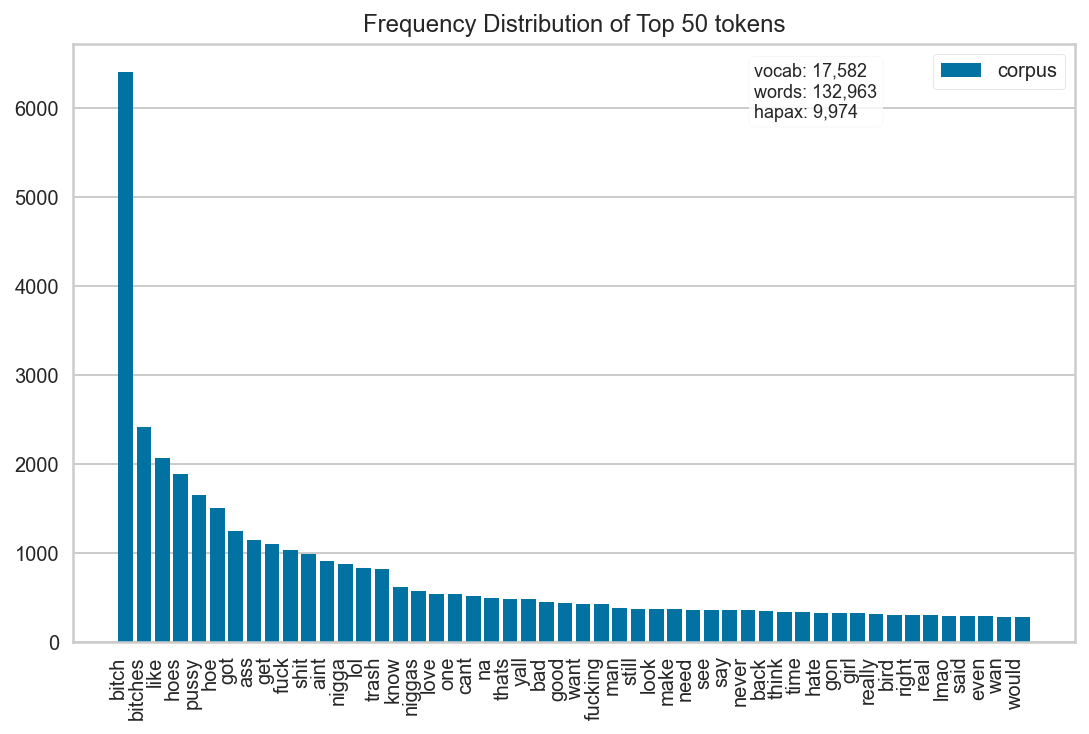

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [102]:
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

/Users/examsherpa/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



FrequencyVisualizer(ax=<AxesSubplot:>,
                    features=['aap', 'ability', 'absolved', 'abuse', 'accept',
                              'acceptable', 'accident', 'accord', 'according',
                              'account', 'accounts', 'acknowledged', 'acl',
                              'across', 'act', 'actin', 'acting', 'activities',
                              'activity', 'acts', 'actual', 'actually', 'add',
                              'added', 'address', 'admit', 'admits', 'admitted',
                              'ads', 'advice', ...],
                    n=None, orient='v')

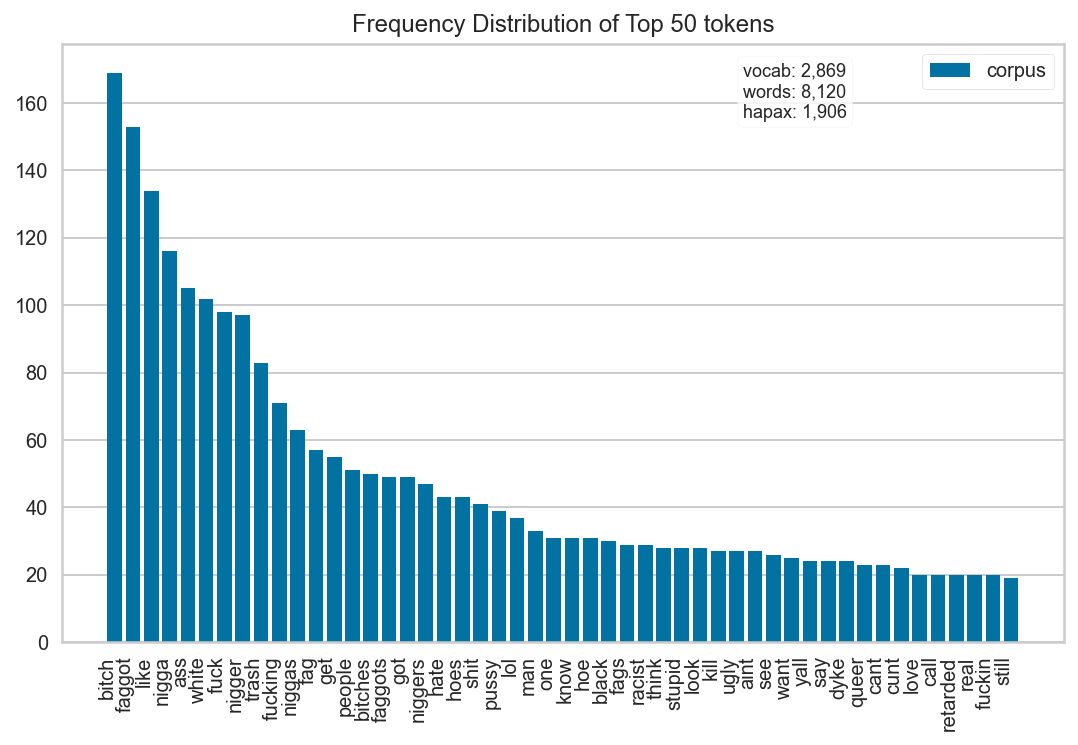

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [103]:
vec = CountVectorizer()
docs = vec.fit_transform(one_tokenz)
features = vec.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

## TSNE

In [1]:

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(zero.tweet)
y = zero.target

tsne(X, y, alpha=0.3, decompose='svd')

NameError: name 'zero' is not defined

## Wordcloud

(-0.5, 399.5, 199.5, -0.5)

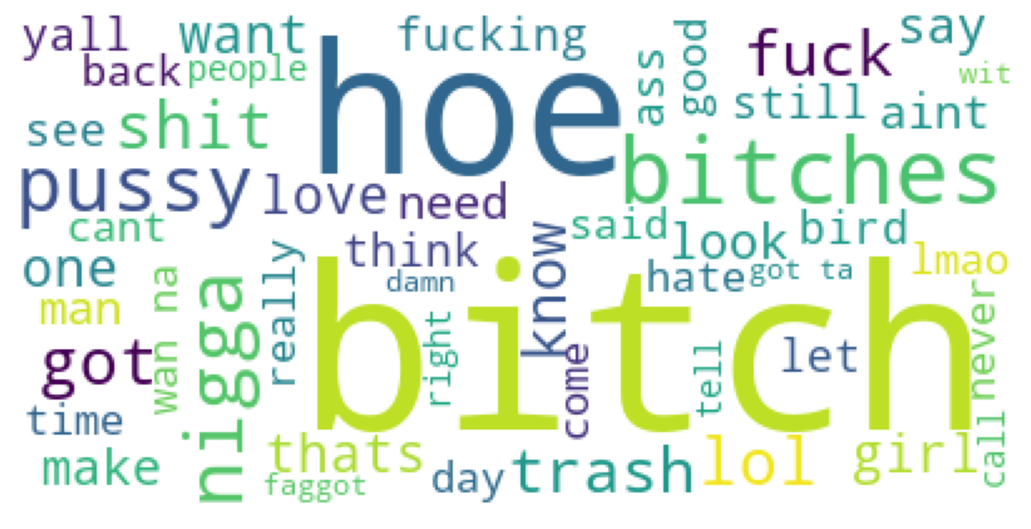

In [106]:

text = ' '.join(zero_tokenz)

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

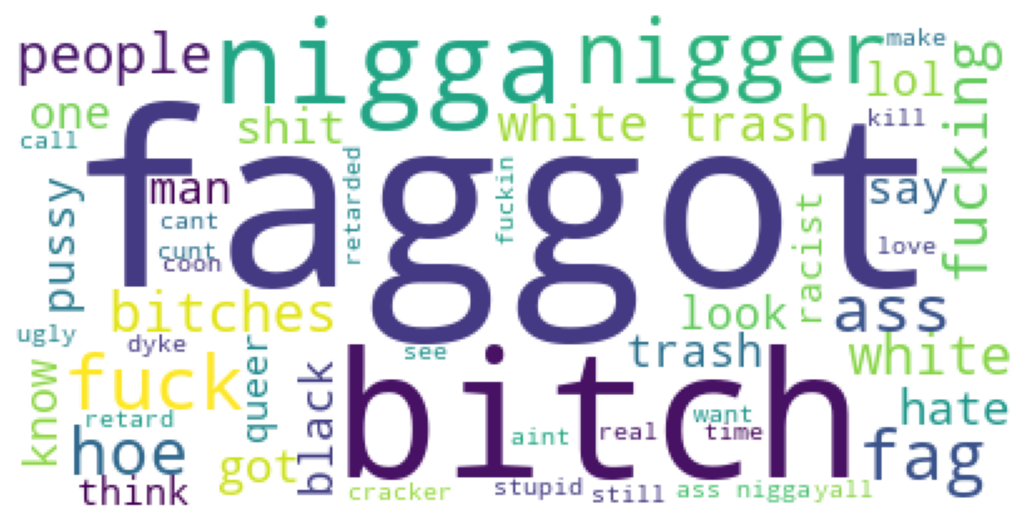

In [107]:
text = ' '.join(one_tokenz)

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

## Stemming and Lemmatization

In [170]:
train_tokens = tokenize(' '.join(train.tweet.to_list()))
val_tokens = tokenize(' '.join(val.tweet.to_list()))


In [171]:
train_tokenz = stopwords(train_tokens)
val_tokenz = stopwords(val_tokens)

In [127]:

ss = PorterStemmer()
def stemming(token_list):
    lst = [ss.stem(w) for w in token_list]
    return lst

In [173]:
train_stem = stemming(train_tokenz)
val_stem = stemming(val_tokenz)

In [129]:

def lemmatization(df):
    df['lem'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df['lem'].head()

In [174]:
lemmatization(train)

0    well how else will white ppl get forget our ho...
1    funny thing isits not just the people doing it...
2                    nigga messed with the wrong bitch
3                                    bitch as nigggaaa
4                                      that real bitch
Name: lem, dtype: object

In [175]:
lemmatization(val)

0                           got missed call from bitch
1    fucking with bad bitch you gone need some mone...
2    lol credit aint where near good but know the r...
3    wipe the cum out them faggot contact lens wild...
4    nigga cheat they bitch and dont expect pay bac...
Name: lem, dtype: object

## Bigrams

In [1]:

def combination_of_words(df):
    return TextBlob(" ".join(train.tweet.to_list())).ngrams(2)

In [2]:
combination_of_words(train)[:50]

NameError: name 'train' is not defined

In [3]:
combination_of_words(test)[:50]

NameError: name 'test' is not defined

## Term Frequency

In [94]:
def term_frequency(df):
    tf1 = (df['tweet'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index())
    tf1.columns = ['words', 'tf']
    tf1 = tf1.sort_values(by='tf', ascending=False).reset_index()
    return tf1

In [95]:
tf1 = term_frequency(train)

In [96]:
tf1.head(10)

index    words      tf
0      3        a  7626.0
1     43    bitch  6571.0
2     87        i  6100.0
3     21      the  5647.0
4     62      you  4885.0
5      0       to  4291.0
6     33      and  3230.0
7     58       my  2940.0
8     48     that  2858.0
9    165  bitches  2462.0

In [97]:
tf2 = term_frequency(test)

In [98]:
tf2.head(10)

index  words      tf
0      8      a  1769.0
1     10     RT  1545.0
2     21    the  1408.0
3      1  bitch  1375.0
4     37      I  1267.0
5     77     to  1022.0
6     11    you   999.0
7     69    and   669.0
8    334     in   611.0
9     27   that   602.0

In [115]:
train.head()

tweet  target
0  well how else will white ppl get   forget our ...       1
1  funny thing isits not just the people doing  i...       0
2                  nigga messed with the wrong bitch       0
3                                 bitch ass nigggaaa       0
4                                    that real bitch       0

In [177]:
pickle.dump(train, open("../pickle/train.pickle", "wb"))
pickle.dump(val, open("../pickle/val.pickle", "wb"))

pickle.dump(train_stem, open("../pickle/train_stem.pickle", "wb"))
pickle.dump(val_stem, open("../pickle/val_stem.pickle", "wb"))